In [ ]:
import keras #se importa la libreria de keras
import numpy as np #Se importa la libreria numpy
import matplotlib.pyplot as plt #se importa la libreria de matplotlib
from keras.datasets import mnist #se importa el dataset MNIST
from keras import utils #se importa Utils la cual proporciona funciones auxiliares
from keras.models import Sequential #Modelo de red neuronal secuencial donde hay una entrada y una salida y pasa por varias capas neuronales una tras de otra
from keras.layers import Dense, Dropout #Dense: Capa de la red neuronal donde todas las neuronas se conectan con las capas anteriores
from keras.layers import Dropout #Droput se refiere a un metodo para evitar el sobre ajuste generalizando mas el sistema mediante la exclusión de algunas neuronas para crear una mayor independencia en las restantes.
from tensorflow.keras.optimizers import SGD, Adam # se importa optimizadores que son algoritmos para modificar los pesos y sesgos durante el entrenamiento para minimizar la función de perdida

In [ ]:
#--------------------------------------------------------------------------------------------------------------------------------
#Se definen los hiperparametros

batch_size=200 # El batch size es la cantidad de ejemplos que va a utilizar el modelo al tiempo para actualizar los pesos en una sola iteración.
n_inputs = 784 # Se define el numero de entradas, 28x28 pixeles  para "aplanar" las imagenes en vectores de 784 elementos
n_classes = 10 #Numero de clases de salida del modelo para predecir(Digitos del 0 al 9)
epochs = 10 # Numero de epocas durante el entrenamiento del modelo
n_neurons = 784 #Numero de neuronas en la capa oculta del modelo
dropout=0.2 #Un porcentaje de las neuronas se "apaga" aleatoriamente para evitar el sobreajuste
optimizer_type = Adam #optimizador a utilizar para minimizar la función de perdida
lr=0.001 # Tasa de aprendizaje inicial para el optimizador,
loss='categorical_crossentropy' # la función de perdida que el modelo va a intentar minimizar durante el entrenamiento

#---------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#Preparación de Datos

# Cargar datos
(x_train,y_train),(x_test,y_test) = mnist.load_data()
# (60000,28,28)
print('x_shape:',x_train.shape)
# (60000)
print('y_shape:',y_train.shape)
# (60000,28,28)->(60000,784)(salida)
x_train = x_train.reshape(x_train.shape[0],-1)/255.0 #(se divide por 255 pixeles,para tener numeros entre 0 y 1)
x_test = x_test.reshape(x_test.shape[0],-1)/255.0
# Cambiar a un formato por categorias (10 debibo a los numeros 0,1,2..9)
y_train = utils.to_categorical(y_train,n_classes)
y_test = utils.to_categorical(y_test,n_classes)

#---------------------------------------------------------------------------------------------------------------------------------

x_shape: (60000, 28, 28)
y_shape: (60000,)


In [ ]:
#creación del modelo secuencial

# Creación del modelo
model = Sequential()
model.add(Dense(units=n_neurons, input_dim=n_inputs, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(units=n_classes, activation='softmax'))

#----------------------------------------------------------------------------------------------------------------------------------
#Configuración del Entrenamiento

# Definir optimizador
optim = optimizer_type(lr=lr) # varie este valor

# Definir optimizador, función de pérdida, precisión de cálculo durante el entrenamiento
model.compile(
    optimizer = optim,
    loss = loss,# funcion de perdida
    metrics=['accuracy'],# metrica, efectividad del modelo
)

#----------------------------------------------------------------------------------------------------------------------
#Entrenamiento del modelo

model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs)


Epoch 1/10
300/300 [==============================] - 13s 38ms/step - loss: 0.2911 - accuracy: 0.9173
Epoch 2/10
300/300 [==============================] - 11s 37ms/step - loss: 0.1219 - accuracy: 0.9641
Epoch 3/10
300/300 [==============================] - 8s 27ms/step - loss: 0.0830 - accuracy: 0.9754
Epoch 4/10
300/300 [==============================] - 6s 19ms/step - loss: 0.0623 - accuracy: 0.9812
Epoch 5/10
300/300 [==============================] - 5s 18ms/step - loss: 0.0478 - accuracy: 0.9859
Epoch 6/10
300/300 [==============================] - 6s 20ms/step - loss: 0.0382 - accuracy: 0.9886
Epoch 7/10
300/300 [==============================] - 5s 17ms/step - loss: 0.0323 - accuracy: 0.9909
Epoch 8/10
300/300 [==============================] - 6s 20ms/step - loss: 0.0258 - accuracy: 0.9924
Epoch 9/10
300/300 [==============================] - 5s 17ms/step - loss: 0.0206 - accuracy: 0.9941
Epoch 10/10
300/300 [==============================] - 6s 19ms/step - loss: 0.0180 - accu

In [ ]:
#  Evaluación del modelo con loss y accuracy
loss,accuracy = model.evaluate(x_test,y_test)
#--------------------------------------------------------------------------------------------------------------------------------------
print('\ntest loss',loss)
print('accuracy',accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0636 - accuracy: 0.9799

test loss 0.06363632529973984
accuracy 0.9799000024795532


313/313 [==============================] - 1s 3ms/step


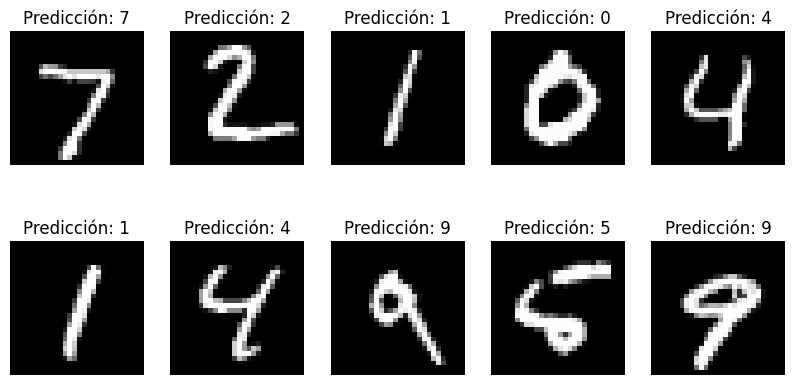

In [ ]:
# Obtener predicciones del modelo
predictions = model.predict(x_test)

# Visualizar los primeros 10 dígitos de prueba junto con las predicciones
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Predicción: {}".format(np.argmax(predictions[i])))
    plt.axis('off')
plt.show()

In [ ]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)


Epoch 1/10
300/300 [==============================] - 6s 20ms/step - loss: 0.0161 - accuracy: 0.9954
Epoch 2/10
300/300 [==============================] - 5s 17ms/step - loss: 0.0134 - accuracy: 0.9962
Epoch 3/10
300/300 [==============================] - 5s 17ms/step - loss: 0.0108 - accuracy: 0.9969
Epoch 4/10
300/300 [==============================] - 6s 20ms/step - loss: 0.0115 - accuracy: 0.9965
Epoch 5/10
300/300 [==============================] - 5s 17ms/step - loss: 0.0098 - accuracy: 0.9973
Epoch 6/10
300/300 [==============================] - 6s 20ms/step - loss: 0.0101 - accuracy: 0.9966
Epoch 7/10
300/300 [==============================] - 5s 17ms/step - loss: 0.0086 - accuracy: 0.9975
Epoch 8/10
300/300 [==============================] - 6s 20ms/step - loss: 0.0072 - accuracy: 0.9981
Epoch 9/10
300/300 [==============================] - 5s 17ms/step - loss: 0.0090 - accuracy: 0.9973
Epoch 10/10
300/300 [==============================] - 5s 17ms/step - loss: 0.0064 - accura

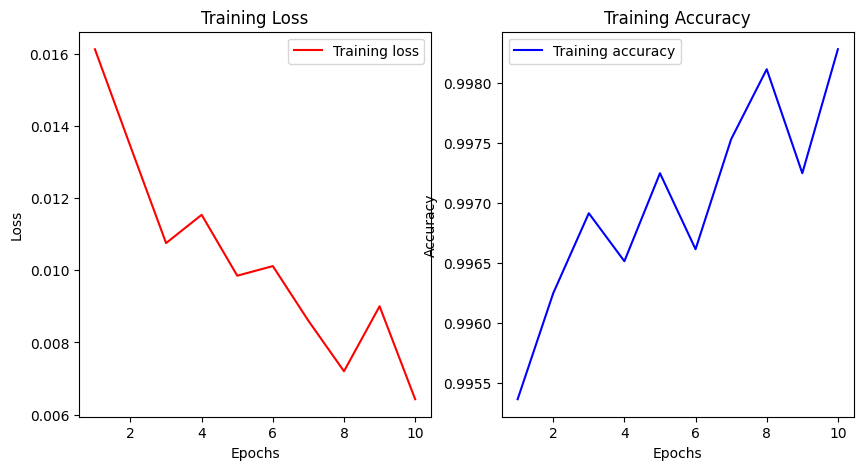

In [ ]:
import matplotlib.pyplot as plt

# Función para graficar el loss y accuracy
def plot_training_curves(history):
    loss = history.history['loss']
    accuracy = history.history['accuracy']

    epochs = range(1, len(loss) + 1)

    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'b', label='Training accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Llamar a la función para graficar el loss y accuracy
plot_training_curves(history)


